In [1]:
from google.colab import files
uploaded = files.upload()

Saving x_train.pkl to x_train.pkl
Saving y_train.pkl to y_train.pkl
Saving y_train_time.pkl to y_train_time.pkl


In [0]:
import pandas as pd

X_train = pd.read_pickle("./x_train.pkl")
y_train = pd.read_pickle("./y_train.pkl")
y_train_time = pd.read_pickle("./y_train_time.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


features remaining :  ['lateral_current_lane', 'lat_pos_vehicle2', 'lat_pos_vehicle1', 'iTTC_ref3', 'longit_pos_vehicle3', 'v_Vel', 'longit_pos_vehicle2', 'longit_pos_vehicle1', 'v_Vel_Ref2', 'v_Vel_follow2']
features removed :  ['v_Vel_Ref1', 'longit_pos_preced1', 'longit_pos_follow2', 'iTTC_preced2', 'v_Vel_follow1', 'longit_pos_preced2', 'v_Vel_preced2', 'longit_pos_follow1', 'v_Vel_preced1', 'v_Vel_Ref3', 'iTTC_preced1', 'iTTC_follow1', 'iTTC_follow2']


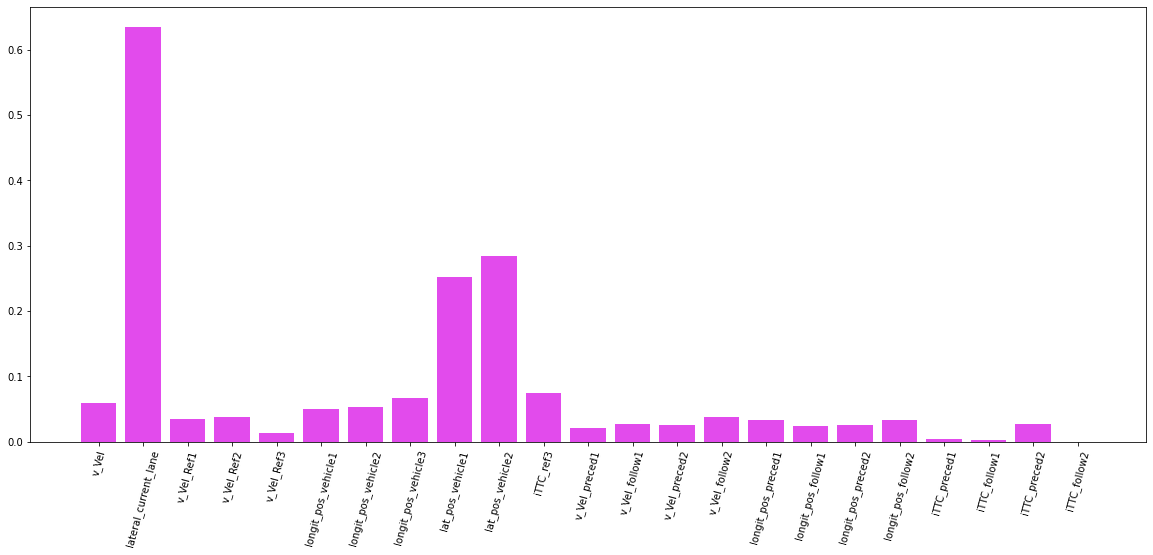

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

def plot_mutualInfosFeatures_classification(data, target):
  """
  Displays and returns the mutual information gain value for each feature with respect to the classification problem

  Parameters
  ----------
    data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
        Data from which the information gain will be calculated, where 
        n_sample is the number of samples and n_features is the number of features.
        
    target : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, regression_truth_value]
        Class of the direction (0 : Left, 1 : Straight, 2 : Right) is the target in classification 
    
  Returns
  -------
    mutual_information_gain_value : numpy array
      contains mutual information gain value for each feature

  """

  ### CALCULATING MUTUAL INFO GAIN VALUES
  featuresDict = {}
  globals()["featuresString"] = []
  features = data.columns
  i=0
  for feature in features:
    featuresDict[feature] = i
    i += 1
    featuresString.append(feature)

  mutual_information_gain_value = mutual_info_classif(data, target)
  
  ### DISPLAYING BAR CHART
  plt.figure(figsize=(20, 8))
  plt.bar(featuresString, mutual_information_gain_value, color="#F92C64")
  plt.xticks(rotation=75)

  return mutual_information_gain_value
  
def plot_mutualInfosFeatures_regression(data, target):
  """
  Displays and returns the mutual information gain value for each feature with respect to the regression problem

  Parameters
  ----------
    data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
        Data from which the information gain will be calculated, where 
        n_sample is the number of samples and n_features is the number of features.
        
    target : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, regression_truth_value]
        Time is the target in regression 
    
  Returns
  -------
    mutual_information_gain_value : numpy array
      contains mutual information gain value for each feature

  """

  ### CALCULATING MUTUAL INFO GAIN VALUES
  featuresDict = {}
  globals()["featuresString"] = []
  features = data.columns
  i=0
  for feature in features:
    featuresDict[feature] = i
    i += 1
    featuresString.append(feature)

  mutual_information_gain_value = mutual_info_regression(data, target)

  ### DISPLAYING BAR CHART
  plt.figure(figsize=(20, 8))
  plt.bar(featuresString, mutual_information_gain_value, color="#E24BEC")
  plt.xticks(rotation=75)

  return mutual_information_gain_value

def keep_K_features(K, mutual_info_feature):
  """
  Select the features which are not the best according to mutual information gain value and return them to remove them

  Parameters
  -------
    K : int
      Number of features you want to select according to the mutual information gain value

    mutual_info_feature : numpy array
      contains mutual information gain value for each feature

  Returns
  -------
    featuresRemoved : list
      contains the name of the features not included in the K top features according to the mutual information gain value

  """

  InformationGain = pd.DataFrame(mutual_info_feature)
  InformationGain['feature']=featuresString
  InformationGain = InformationGain.sort_values(0, ascending=False).reset_index(drop=True)

  featuresRemaining = []
  featuresRemoved = []

  for i in range (0, K):
    featuresRemaining.append(InformationGain['feature'][i])

  for i in range (K, len(featuresString)):
    featuresRemoved.append(InformationGain['feature'][i])

  print("features remaining : ", featuresRemaining)
  print("features removed : ", featuresRemoved)
  return featuresRemoved

def rmv_mutual_info_gain_regression(data, target, K):
  """
  Measures the mutual information gained for each feature and returns the top K features with respect to the regression problem

  Parameters
  -------
    data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
      Data from which the information gain will be calculated, where 
      n_sample is the number of samples and n_features is the number of features.
      
    target : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, regression_truth_value]
      Time is the target in regression 
  
    K : int
      Number of features you want to select according to the mutual information gain value
    
  Returns
  -------
    data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
      Data has been transformed. It contains now only the top K features you would select

  """
  IG_regression = plot_mutualInfosFeatures_regression(data, target)
  featuresRemoved = keep_K_features(K, IG_regression)

  for feature in featuresRemoved:
    data = data.drop(feature, 1)
  return data

def rmv_mutual_info_gain_classification(data, target, K):
  """
  Measures the mutual information gained for each feature and returns the top K features with respect to the classification problem

  Parameters
      ----------
      data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
          Data from which the information gain will be calculated, where 
          n_sample is the number of samples and n_features is the number of features.
          
      target : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, classification_truth_value]
          Class of the direction (0 : Left, 1 : Straight, 2 : Right) is the target in classification 
      
      K : int
        Number of features you want to select according to the mutual information gain value

  Returns
      -------

      data : {array-like, sparse matrix, pandas Dataframe}, shape = [n_samples, n_features]
        Data has been transformed. It contains now only the top K features you would select
  """
  IG_classification = plot_mutualInfosFeatures_classification(data, target)
  featuresRemoved = keep_K_features(K, IG_classification)

  for feature in featuresRemoved:
    data = data.drop(feature, 1)
  return data

# EXEMPLE
X_train = rmv_mutual_info_gain_regression(X_train, y_train_time, 10)

In [0]:
import pandas as pd

X_train = pd.read_pickle("./x_train.pkl")
y_train = pd.read_pickle("./y_train.pkl")
y_train_time = pd.read_pickle("./y_train_time.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


features remaining :  ['lateral_current_lane', 'lat_pos_vehicle1', 'lat_pos_vehicle2', 'longit_pos_vehicle1', 'longit_pos_preced2']
features removed :  ['longit_pos_follow2', 'longit_pos_vehicle2', 'longit_pos_preced1', 'v_Vel', 'longit_pos_follow1', 'longit_pos_vehicle3', 'v_Vel_Ref1', 'v_Vel_preced2', 'v_Vel_follow1', 'v_Vel_preced1', 'v_Vel_Ref2', 'v_Vel_Ref3', 'v_Vel_follow2', 'iTTC_ref3', 'iTTC_follow2', 'iTTC_preced1', 'iTTC_follow1', 'iTTC_preced2']


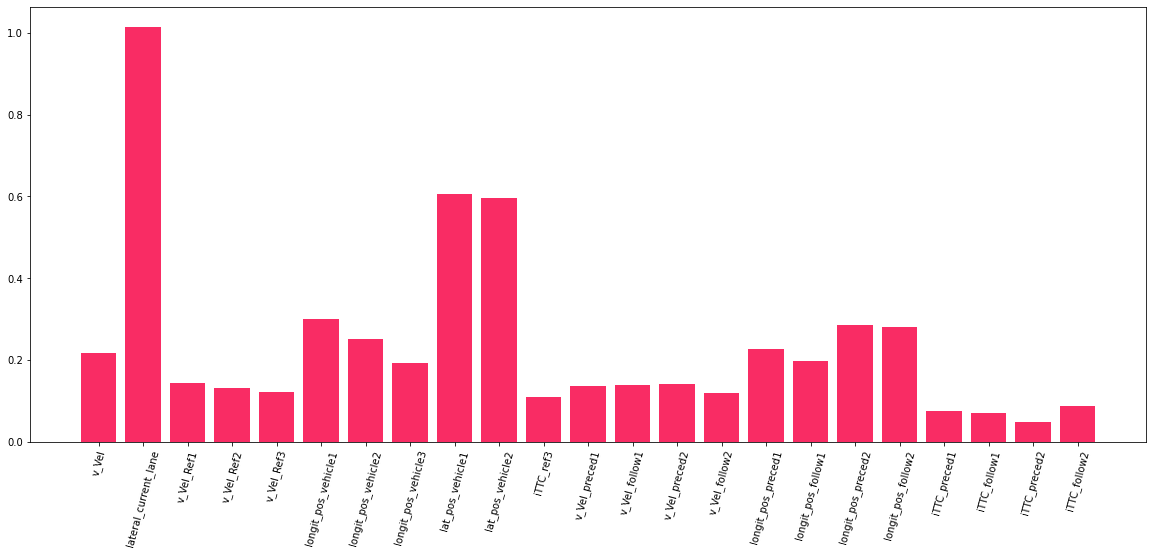

In [22]:
X_train = rmv_mutual_info_gain_classification(X_train, y_train, 5)